In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#dropping unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#Here x,y,z are the height,width and depth of the diamond. Notice we have the Depth column already,but its the
The height of a diamond, measured from the culet to the table, divided by its average girdle diameter.

Price column looks skewed. it could be due to the premium quality of the diamond.


In [6]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


#As we see, we dont have any null values in cat and num columns. Cut defines the type of the cut of diamond.

### Uni-Variate Analysis

<Axes: xlabel='price', ylabel='Count'>

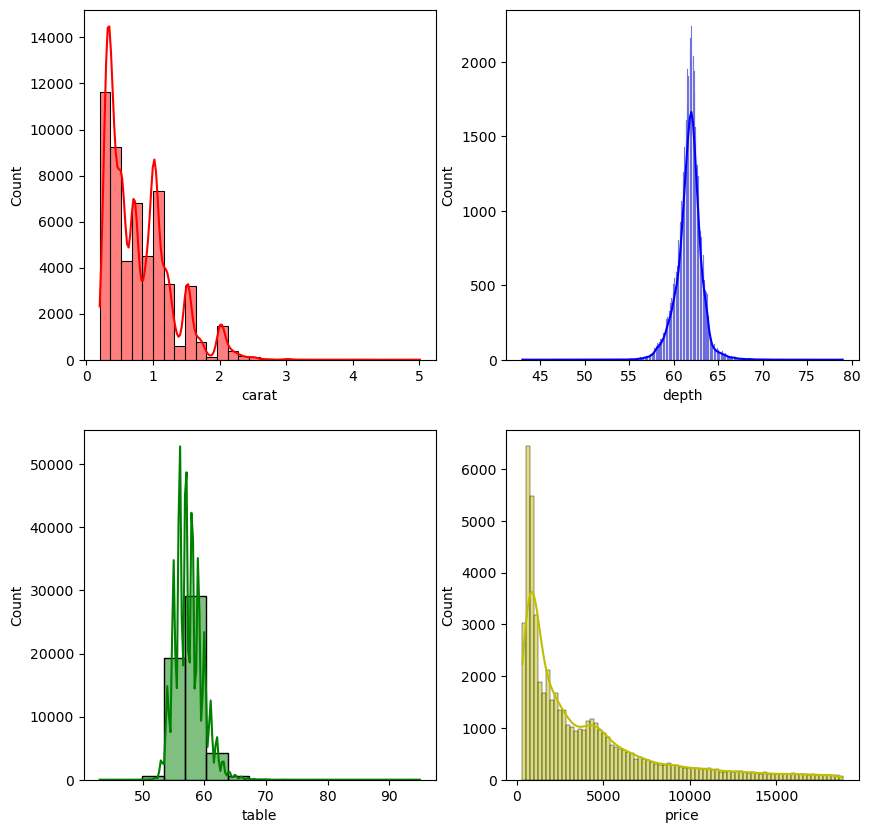

In [7]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.histplot(df,x='carat',ax=ax[0,0],kde=True,color='r',bins=30)
sns.histplot(df,x='depth',ax=ax[0,1],kde=True,color='b')
sns.histplot(df,x='table',ax=ax[1,0],kde=True,color='g',bins=15)
sns.histplot(df,x='price',ax=ax[1,1],kde=True,color='y')
#if we observe,we have carat and price plots right skewed. 

<Axes: ylabel='z'>

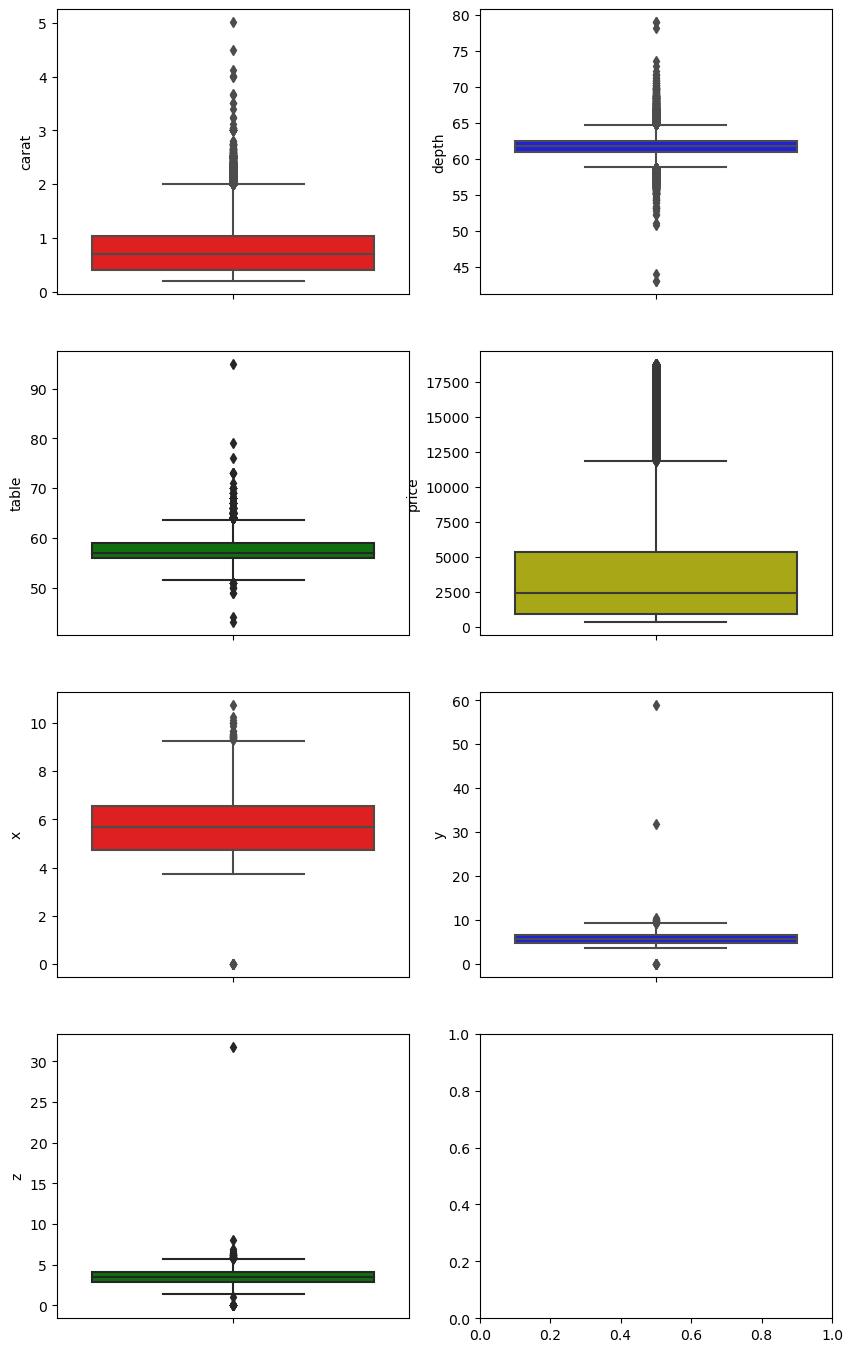

In [8]:
fig,ax=plt.subplots(4,2,figsize=(10,17))
sns.boxplot(df,y='carat',ax=ax[0,0],color='r')
sns.boxplot(df,y='depth',ax=ax[0,1],color='b')
sns.boxplot(df,y='table',ax=ax[1,0],color='g')
sns.boxplot(df,y='price',ax=ax[1,1],color='y')
sns.boxplot(df,y='x',ax=ax[2,0],color='r')
sns.boxplot(df,y='y',ax=ax[2,1],color='b')
sns.boxplot(df,y='z',ax=ax[3,0],color='g')
#carat,price,table and depth columns are highly skewed.

<Axes: xlabel='cut', ylabel='count'>

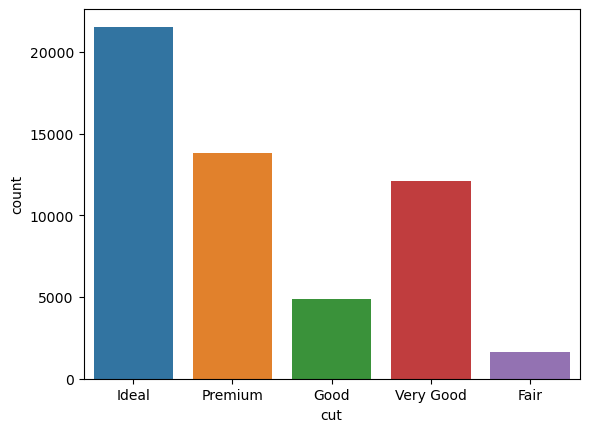

In [9]:
sns.countplot(df,x='cut')
#diamonds with ideal cuts are significantly higher than the other types

<Axes: xlabel='color', ylabel='count'>

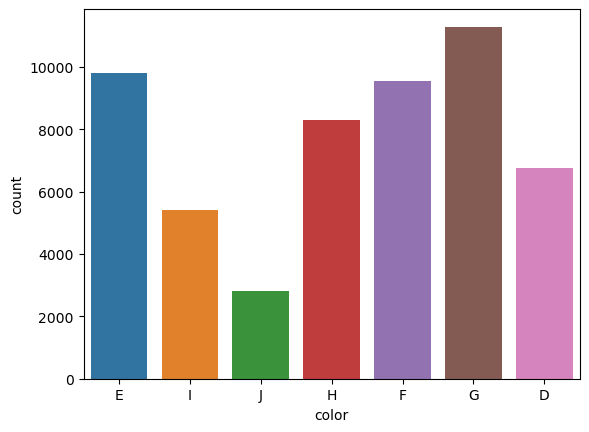

In [10]:
sns.countplot(df,x='color')
#D being the Best to J being the worst.

<Axes: ylabel='clarity'>

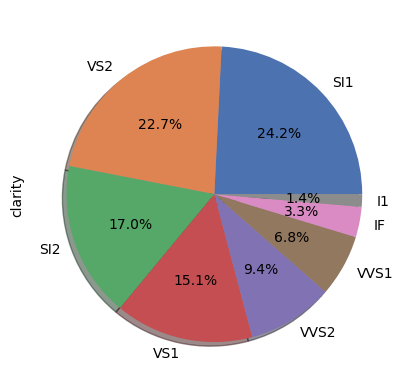

In [11]:
df['clarity'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('deep'),shadow=True)

### Bi Variate Analysis

<Axes: xlabel='carat', ylabel='price'>

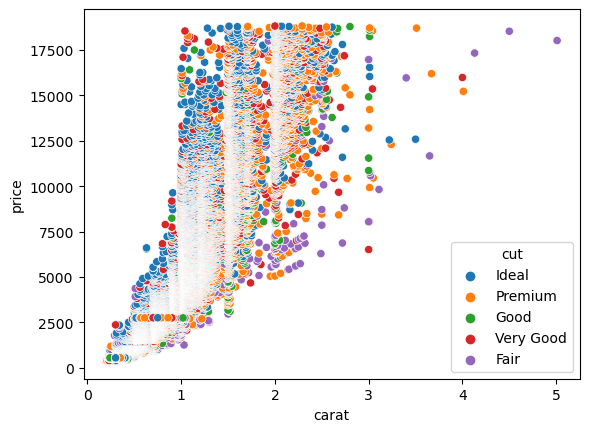

In [12]:
sns.scatterplot(df,x='carat',y='price',hue='cut')
#as we have 53K records,its very hard to visualise from this scatterplot.
#but on whole,its evident the price increases with carats

C:\Users\naren\AppData\Local\Temp\ipykernel_21912\128257426.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='viridis',annot=True)


<Axes: >

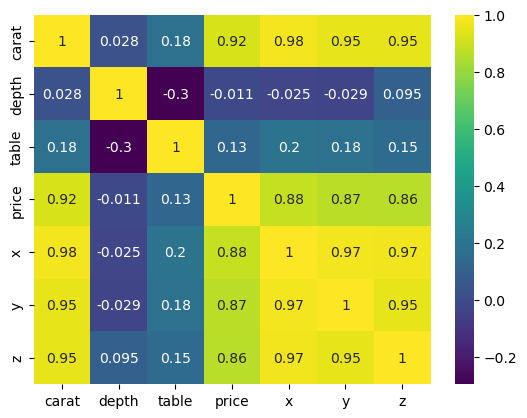

In [13]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)
#from this we can see the correlation between various numeric columns

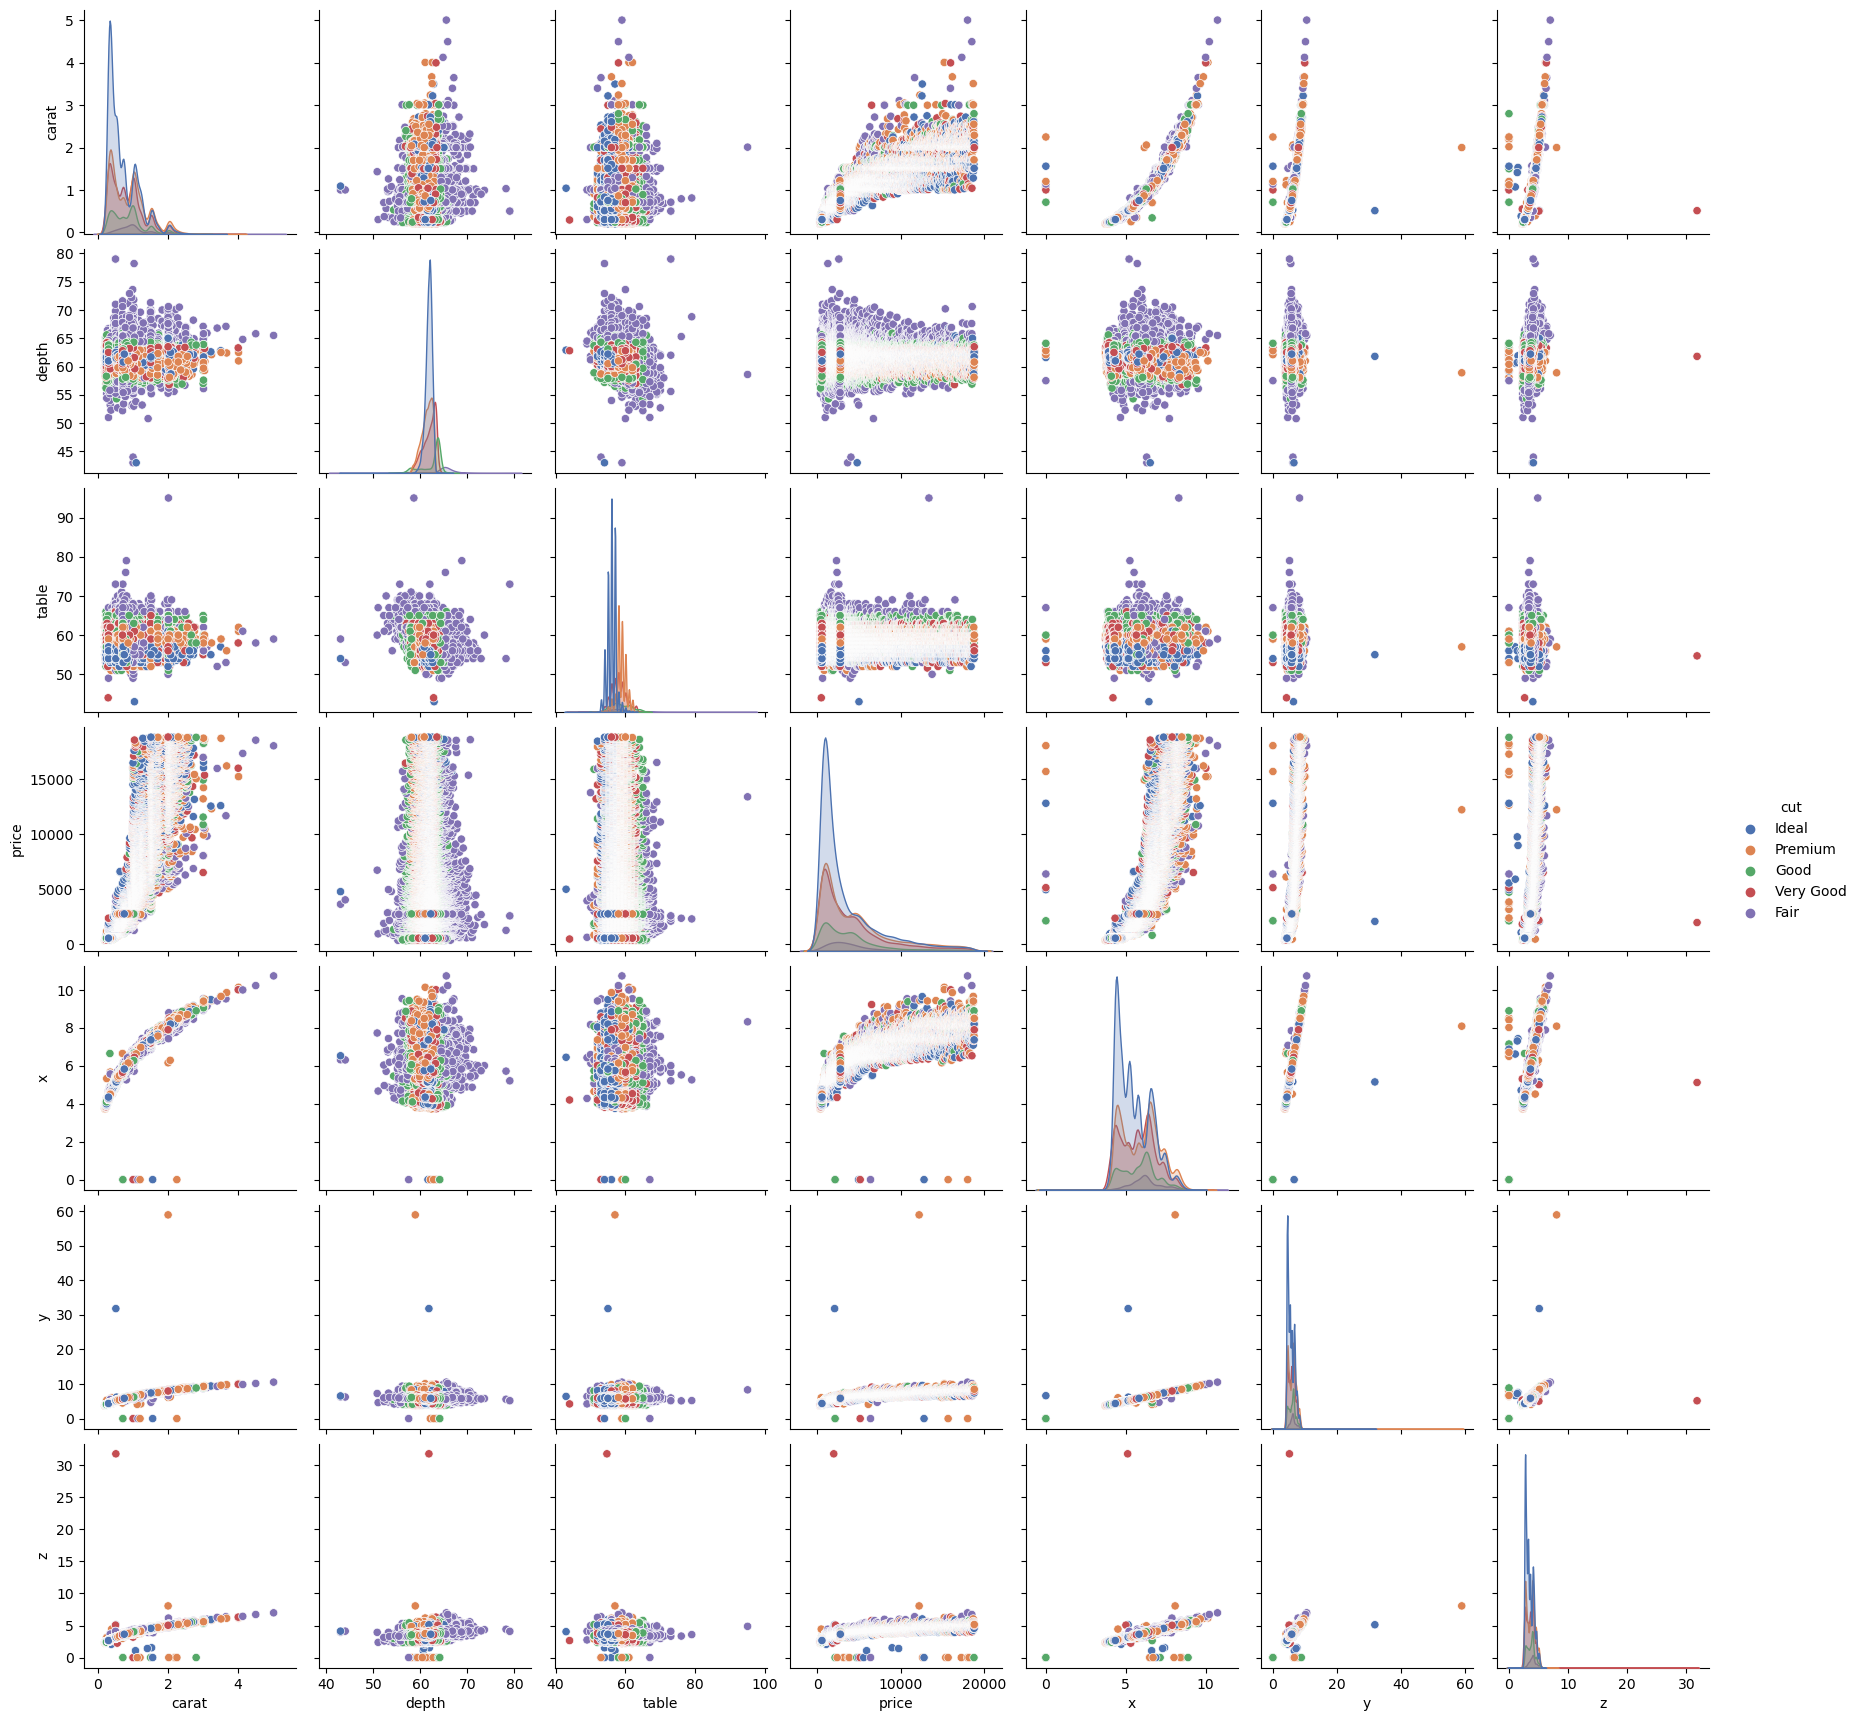

In [14]:
sns.pairplot(df,palette='deep',hue='cut')

<Axes: xlabel='cut', ylabel='price'>

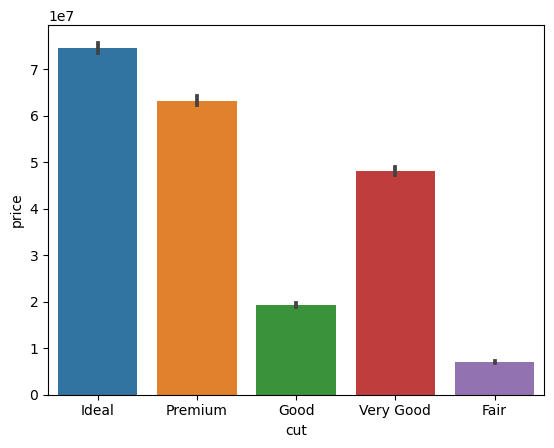

In [15]:
sns.barplot(df,x='cut',y='price',estimator='sum')

In [16]:
df['price'].groupby(df['cut']).count()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: price, dtype: int64

In [17]:
df['price'].groupby(df['cut']).sum()

cut
Fair          7017600
Good         19275009
Ideal        74513487
Premium      63221498
Very Good    48107623
Name: price, dtype: int64

<Axes: xlabel='color', ylabel='price'>

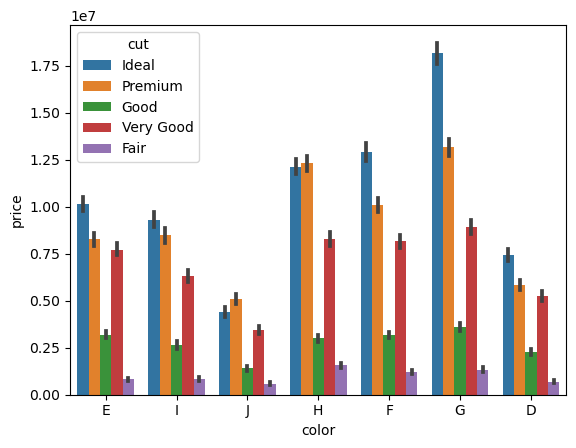

In [18]:
sns.barplot(df,x='color',y='price',estimator='sum',hue='cut')

<Axes: xlabel='clarity', ylabel='price'>

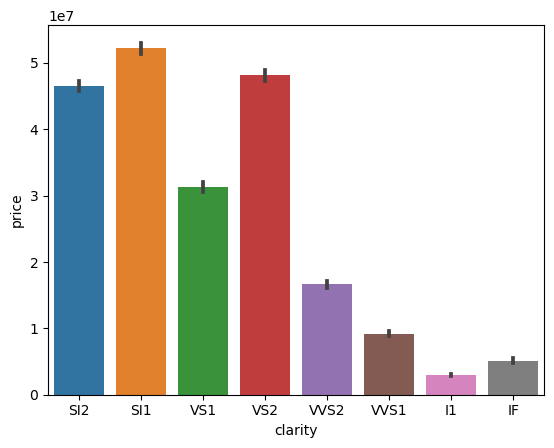

In [19]:
sns.barplot(df,x='clarity',y='price',estimator='sum')

In [20]:
df.groupby(['cut','color'])[['price']].sum()
#df.groupby(['region', 'product'])[['sales', 'qty']].sum()

price
cut       color          
Fair      D        699443
          E        824838
          F       1194025
          G       1331126
          H       1556112
          I        819953
          J        592103
Good      D       2254363
          E       3194260
          F       3177637
          G       3591553
          H       3001931
          I       2650994
          J       1404271
Ideal     D       7450854
          E      10138238
          F      12912518
          G      18171930
          H      12115278
          I       9317974
          J       4406695
Premium   D       5820962
          E       8270443
          F      10081319
          G      13160170
          H      12311428
          I       8491146
          J       5086030
Very Good D       5250817
          E       7715165
          F       8177367
          G       8903461
          H       8272552
          I       6328079
          J       3460182

### outliers

In [21]:
df_num=df.select_dtypes('number')

In [22]:
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR

In [23]:
df=df[((df_num>lower_bound) & (df_num<upper_bound)).all(axis='columns')]

In [24]:
df.shape

(47483, 10)

In [25]:
df.describe()

,carat,depth,table,price,x,y,z
count,47483.000000,47483.000000,47483.000000,47483.000000,47483.000000,47483.000000,47483.000000
mean,0.707606,61.786269,57.259116,3103.596845,5.544541,5.549417,3.427061
std,0.369363,1.105458,2.020705,2742.602132,0.977650,0.971851,0.604737
min,0.200000,58.800000,52.000000,326.000000,3.730000,3.680000,1.410000
25%,0.380000,61.100000,56.000000,889.000000,4.640000,4.650000,2.850000
50%,0.600000,61.900000,57.000000,2058.000000,5.440000,5.450000,3.350000
75%,1.010000,62.500000,59.000000,4628.000000,6.410000,6.410000,3.980000
max,1.990000,64.700000,63.400000,11883.000000,8.100000,8.210000,5.060000


<Axes: ylabel='z'>

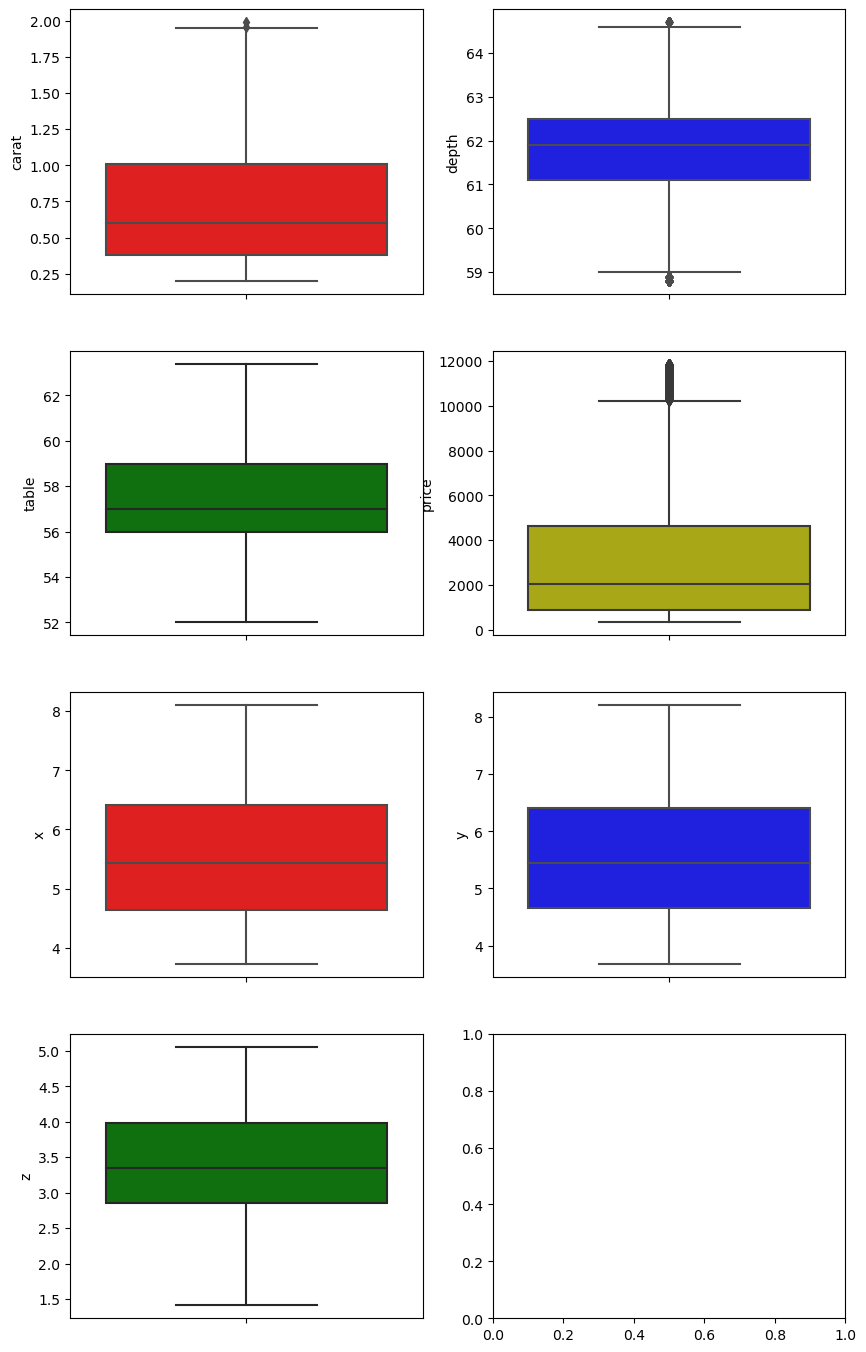

In [26]:
fig,ax=plt.subplots(4,2,figsize=(10,17))
sns.boxplot(df,y='carat',ax=ax[0,0],color='r')
sns.boxplot(df,y='depth',ax=ax[0,1],color='b')
sns.boxplot(df,y='table',ax=ax[1,0],color='g')
sns.boxplot(df,y='price',ax=ax[1,1],color='y')
sns.boxplot(df,y='x',ax=ax[2,0],color='r')
sns.boxplot(df,y='y',ax=ax[2,1],color='b')
sns.boxplot(df,y='z',ax=ax[3,0],color='g')
#now the data looks fine without the outliers

### Train Test Split

In [27]:
X=df.drop('price',axis=1)
y=df['price']

In [28]:
X_num=X.select_dtypes('number')
X_cat=X.select_dtypes('object')
X_cat_encoded=pd.get_dummies(X_cat,dtype=int)


In [29]:
X_cat_encoded.shape,X_num.shape

((47483, 20), (47483, 6))

In [30]:
X=pd.concat([X_num,X_cat_encoded],axis=1)

In [31]:
X.shape

(47483, 26)

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,train_size=0.70)

In [33]:
X_train.shape,y_test.shape

((33238, 26), (14245,))

### Hold Out Method

In [34]:
Mape_train=[]
Mape_test=[]
for k in list(range(1,30,2)):
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred)
    Mape_train.append(train_MAPE)
    y_test_pred=model.predict(X_test)
    test_MAPE=mean_absolute_percentage_error(y_test,y_test_pred)
    Mape_test.append(test_MAPE)

<Axes: >

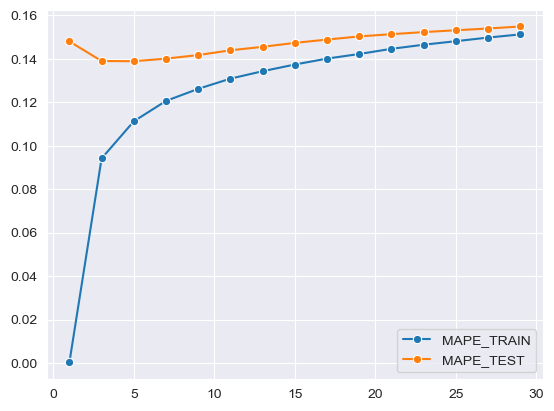

In [35]:
sns.set_style('darkgrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',marker='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',marker='o')

### CV Score Method

In [36]:
k_values = np.arange(1, 30, 2)
cv_mape_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

In [37]:
def cv():
    k_values = np.arange(1, 30, 2)
    cv_mape_scores = []
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    # Calculate CV MAPE using cross-validation (CV) with full X and y
        cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
    return cv_mape_scores

cv_mape=cv()

<Axes: >

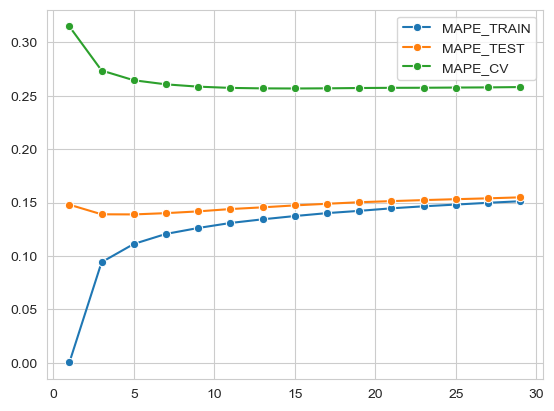

In [38]:
sns.set_style('whitegrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',marker='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',marker='o')
sns.lineplot(y=cv_mape,x=list(range(1,30,2)),label='MAPE_CV',marker='o')

#at K=3 we can see the minimum difference between the Test MAPE,Train MAPE, CV MAPE

### CV Method using Function

In [39]:
def cv(X,y):
    #mape_train_lst=[]
    mape_test_lst=[]
    CV_mape_lst=[]
    for k in list(range(1,30,2)):
        #print('entered 1st for')
        for j in list(range(1,3)):
            #print('entered second for')
            X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.3)
            #print(X_train.shape,y_train.shape)
            model=KNeighborsRegressor(n_neighbors=k)
            model.fit(X_train,y_train)
            #y_train_pred=model.predict(X_train)
            #Mape_train=mean_absolute_percentage_error(y_train,y_train_pred)
            #mape_train_lst.append(Mape_train)
            y_test_pred=model.predict(X_test)
            #print(y_test_pred.shape)
            Mape_test=mean_absolute_percentage_error(y_test,y_test_pred)
            mape_test_lst.append(Mape_test)
            #print(Mape_test)
        CV_mape_lst.append(np.mean(mape_test_lst))
    print(CV_mape_lst)
    return CV_mape_lst

    
CV_scores=cv(X,y)

[0.15007572862415944, 0.1434858685672975, 0.1421196164797797, 0.14186982672007065, 0.14192025558368176, 0.14226027780973963, 0.14295992702165528, 0.14338202185948606, 0.14406797807189323, 0.14485298968081187, 0.1455717949791461, 0.1461608466261407, 0.14675235644850693, 0.14746921098775045, 0.14808230159746097]


In [40]:
CV_scores

[0.15007572862415944,
 0.1434858685672975,
 0.1421196164797797,
 0.14186982672007065,
 0.14192025558368176,
 0.14226027780973963,
 0.14295992702165528,
 0.14338202185948606,
 0.14406797807189323,
 0.14485298968081187,
 0.1455717949791461,
 0.1461608466261407,
 0.14675235644850693,
 0.14746921098775045,
 0.14808230159746097]

<Axes: >

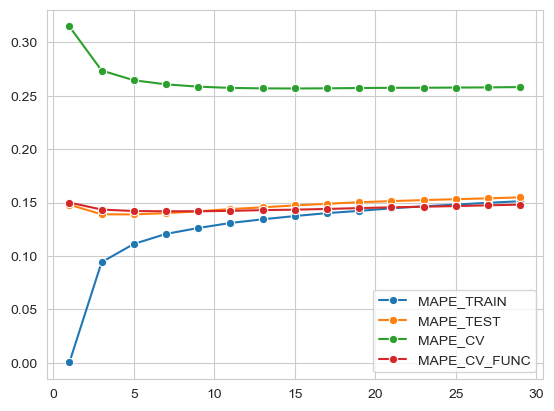

In [41]:
sns.set_style('whitegrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',marker='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',marker='o')
sns.lineplot(y=cv_mape,x=list(range(1,30,2)),label='MAPE_CV',marker='o')
sns.lineplot(y=CV_scores,x=list(range(1,30,2)),label='MAPE_CV_FUNC',marker='o')